In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
path = 'Questionnaire.csv'
Survey = pd.read_csv(path)

In [6]:
Survey.head()

,Timestamp,mbti,fav_colour,life_value,settle_city,single_child,comfort_zone,parental_relationship,childhood_experience,parent_contact_frequency,place_grow_up,age
0,2024/10/17 12:54:26 PM GMT+1,INTP,blue,family,bustling metropolis,yes,by yourself,neutral,neutral,daily,bustling metropolis,16 to 25
1,2024/10/17 12:58:32 PM GMT+1,No idea,red,family,everywhere,no,by yourself,positive,positive,daily,bustling metropolis,16 to 25
2,2024/10/17 1:02:58 PM GMT+1,No idea,green,family,no place,no,with someone,positive,neutral,monthly,countryside village,16 to 25
3,2024/10/17 1:06:48 PM GMT+1,ENFJ,red,family,coastal,no,with someone,positive,positive,daily,countryside village,25 to 35
4,2024/10/17 1:07:15 PM GMT+1,ENFP,blue,family,coastal,yes,NaN,neutral,positive,weekly,quiet suburb,16 to 25


In [7]:
# The attribution of place people grew up in  and wish to settle done

In [15]:
hometown_attri = Survey['place_grow_up'].tolist()
print (hometown_attri)

['bustling metropolis', 'bustling metropolis', 'countryside village', 'countryside village', 'quiet suburb', 'bustling metropolis', 'quiet suburb', 'coastal', 'coastal', 'bustling metropolis', 'everywhere', 'bustling metropolis', 'Isolated country', 'bustling metropolis', 'bustling metropolis', 'bustling metropolis', 'bustling metropolis', 'bustling metropolis', 'bustling metropolis']


In [17]:
place_counts = pd.Series(hometown_attri).value_counts()
print (place_counts)

bustling metropolis    11
countryside village     2
quiet suburb            2
coastal                 2
everywhere              1
Isolated country        1
Name: count, dtype: int64


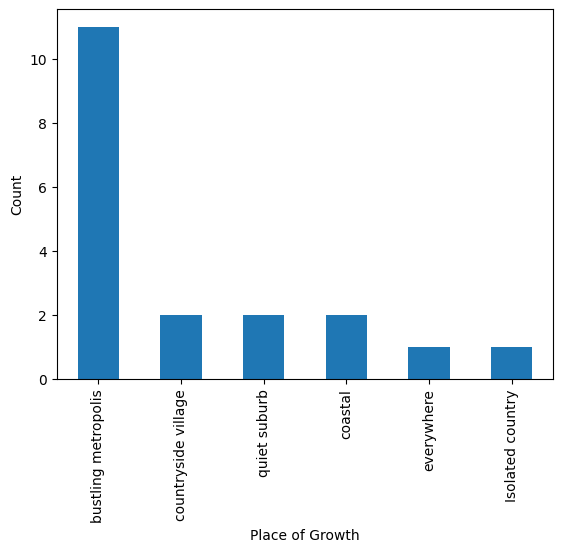

In [18]:
place_counts.plot(kind='bar')
plt. title = hometown_attri
plt. xlabel ('Place of Growth')
plt. ylabel ('Count')
plt.show()

In [ ]:
# Most of the people in our group grew up in big cities.

In [4]:
# How does childhood upbringing influence future preferred settling place?
# Hypothesis - people with positive childhood experiences will tend to settle in similar places, vice versa

In [25]:
sliced_survey = Survey[['place_grow_up','childhood_experience','settle_city']]
print(sliced_survey)

          place_grow_up childhood_experience          settle_city
0   bustling metropolis              neutral  bustling metropolis
1   bustling metropolis             positive           everywhere
2   countryside village              neutral             no place
3   countryside village             positive              coastal
4          quiet suburb             positive              coastal
5   bustling metropolis             positive         quiet suburb
6          quiet suburb             positive  countryside village
7               coastal          challenging  bustling metropolis
8               coastal             positive              coastal
9   bustling metropolis             positive           everywhere
10           everywhere             positive           everywhere
11  bustling metropolis             positive  bustling metropolis
12     Isolated country          challenging           everywhere
13  bustling metropolis          challenging  bustling metropolis
14  bustli

In [26]:
type(sliced_survey)

pandas.core.frame.DataFrame

In [27]:
sliced_survey['neutral_positive']= sliced_survey['childhood_experience'].apply(lambda x:  x in ['neutral','positive'])
sliced_survey

/var/folders/8t/h_ygnqfn40n6grnn231r3rlm0000gn/T/ipykernel_30532/3449680722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sliced_survey['neutral_positive']= sliced_survey['childhood_experience'].apply(lambda x:  x in ['neutral','positive'])


,place_grow_up,childhood_experience,settle_city,neutral_positive
0,bustling metropolis,neutral,bustling metropolis,True
1,bustling metropolis,positive,everywhere,True
2,countryside village,neutral,no place,True
3,countryside village,positive,coastal,True
4,quiet suburb,positive,coastal,True
5,bustling metropolis,positive,quiet suburb,True
6,quiet suburb,positive,countryside village,True
7,coastal,challenging,bustling metropolis,False
8,coastal,positive,coastal,True
9,bustling metropolis,positive,everywhere,True


In [37]:
true_survey = sliced_survey[['place_grow_up','childhood_experience','settle_city','neutral_positive']]
print(true_survey)

          place_grow_up childhood_experience          settle_city  \
0   bustling metropolis              neutral  bustling metropolis   
1   bustling metropolis             positive           everywhere   
2   countryside village              neutral             no place   
3   countryside village             positive              coastal   
4          quiet suburb             positive              coastal   
5   bustling metropolis             positive         quiet suburb   
6          quiet suburb             positive  countryside village   
7               coastal          challenging  bustling metropolis   
8               coastal             positive              coastal   
9   bustling metropolis             positive           everywhere   
10           everywhere             positive           everywhere   
11  bustling metropolis             positive  bustling metropolis   
12     Isolated country          challenging           everywhere   
13  bustling metropolis          c

In [39]:
filtered_true_survey = true_survey[true_survey['neutral_positive'] == True]
print (filtered_true_survey)

          place_grow_up childhood_experience          settle_city  \
0   bustling metropolis              neutral  bustling metropolis   
1   bustling metropolis             positive           everywhere   
2   countryside village              neutral             no place   
3   countryside village             positive              coastal   
4          quiet suburb             positive              coastal   
5   bustling metropolis             positive         quiet suburb   
6          quiet suburb             positive  countryside village   
8               coastal             positive              coastal   
9   bustling metropolis             positive           everywhere   
10           everywhere             positive           everywhere   
11  bustling metropolis             positive  bustling metropolis   
14  bustling metropolis             positive           everywhere   
15  bustling metropolis              neutral             mountain   
16  bustling metropolis           

In [61]:
survey_comparision = filtered_true_survey[['place_grow_up', 'settle_city']]
print (survey_comparision)

          place_grow_up          settle_city
0   bustling metropolis  bustling metropolis
1   bustling metropolis           everywhere
2   countryside village             no place
3   countryside village              coastal
4          quiet suburb              coastal
5   bustling metropolis         quiet suburb
6          quiet suburb  countryside village
8               coastal              coastal
9   bustling metropolis           everywhere
10           everywhere           everywhere
11  bustling metropolis  bustling metropolis
14  bustling metropolis           everywhere
15  bustling metropolis             mountain
16  bustling metropolis         quiet suburb
17  bustling metropolis         quiet suburb
18  bustling metropolis         quiet suburb


In [69]:
for comparison in survey_comparision: 
    if survey_comparision['place_grow_up'] == survey_comparision['settle_city']:
        print ('True') 
    else:
        print ('False')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
# the relationship between single_child and comfort_zone

In [58]:
sliced_survey_zone = Survey[['single_child','comfort_zone']]
print (sliced_survey_zone)

   single_child  comfort_zone
0           yes   by yourself
1            no   by yourself
2            no  with someone
3            no  with someone
4           yes           NaN
5           yes  with someone
6           yes  with someone
7           yes   by yourself
8            no  with someone
9           yes  with someone
10           no  with someone
11           no   by yourself
12           no   by yourself
13           no   by yourself
14           no   by yourself
15           no   by yourself
16           no   by yourself
17           no   by yourself
18           no   by yourself


In [70]:
# Hypothesis : if you are the single child, you prefer to be with someone, if you are not the single child you prefer personal space

In [74]:
for ture in sliced_survey_zone: 
    if (sliced_survey_zone['single_child'] == 'no' ) == (sliced_survey_zone['comfort_zone'] == 'by yourself') :
        print ('yes')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().